# Diferencias Finitas en el Dominio de la Frecuencia
## Caso unidimensional

Se emplea una discretización por diferencias finitas tanto espacial como temporal, usando aproximación central.
$$ \frac{df(z_i)}{dz} = \frac {f_{i+\frac{1}{2}} - f_{i-\frac{1}{2}}} {\Delta z} $$

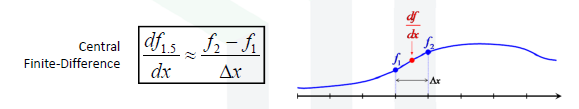


Se asume propagación de la onda electromagnética a lo largo del eje $z$, y se considera polarización de la intensidad de campo eléctrico en $y$ y el de intensidad de campo magnético en $x$. Las ecuaciones rotacionales de Maxwell quedan la sigueinte forma:
$$ j\omega \mu H_x = \frac{\partial E_y}{\partial z} $$
$$ j\omega \epsilon E_y = \frac{\partial H_x}{\partial z} - \sigma E_y $$
donde $\mu$, $\epsilon$ y $\sigma$ son las propiedades constitutivas del medio.

Se obtiene las siguientes expresiones de las Ecuaciones de Maxwell dicretizadas por Diferencias Finitas en el Dominio de la frecuencia:

$$ j\omega \mu H^{x}_{i+\frac{1}{2}} + \frac{E_{i} - E_{i+1}}{\Delta z} = 0 $$
$$ (j \omega \epsilon_i + \sigma)E^{y}_i + (H^{x}_{i-\frac{1}{2}}-H^{x}_{i+\frac{1}{2}})\frac{1}{\Delta z} = 0  $$



In [1]:
import numpy as np  
import matplotlib as mpl 
import matplotlib.pyplot as plt  
import math
from cmath import sqrt
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact

In [ ]:
%run Cavidad_aire_FDFD_1D_C.F.Cero.ipynb

In [ ]:
wnum=2*np.pi*fnum
wnum,len(w),6.776e+09*2*np.pi,fnum

In [2]:
# Parámetros
PPW = 50  # Points Per Wavelenght


In [4]:
a = 0
b = 22 / 100           #Se define una cavidad de 22 cm, para darle espacio a la sección de vacío y la división de tejidos aproximadamente de 12 cm

L = b-a
fmax = 3e9 
w=3e9
e0 = 8.8541878176e-12   #Permitividad del vacio F/m
m0 = (4e-7)*np.pi       #Permeabilidad del vacío (T*m)/A


mr = 1                  #Permeabilidad relativa en el vacío
er = 1                  #Permitividad relativa en el vacío


#Permitividades relativas a 3GHz------------------------------

#erp= 37       #Piel
#era= 11       #Tejido adiposo 
#erg= 34       #Tejido glandular sano
#ergc= 46      #Tejido glandular con cáncer
#erm= 54       #Tejido muscular

#--------------------------------------------------------------

#Conductividades a 3GHz----------------------------------------

sg = 0              #Vacío
sgp= 0.0002         #Piel 
sga= 0.036          #Tejido adiposo
sggs= 0.713         #Tejido glandular 
sggc = 0.899        #Tumor
sgm= 0.2            #Músculo
#---------------------------------------------------------------


mu = mr * m0            #Permeabilidad del tejido



#----------------------------------------------------------------
#-------------------------------------




In [5]:
#Permitividades, ecuación de debye

#PIEL
erp = 4+(32/(1+1j*w*7.23e-12)) #+sgp/(1j*w*e0)
era = 3.140+(1.708/(1+1j*w*(14.65e-12)**(1-0.061))) #+sga/(1j*w*e0)
erg = 7.821 +(41.48/(1+1j*w*(10.66e-12)**(1-0.047))) #+sggs/(1j*w*e0)
ergc = 9.058+(51.31/(1+1j*w*(10.84e-12)**(1-0.022))) #+sggc/(1j*w*e0)
erm = 4+(50/(1+1j*w*(7.23e-12)**(1-0.10))) #+sgm/(1j*w*e0)

#Permitividades del tejido--------------------------------------

eps = er * e0           #Vacío
epsp = erp *e0          #Piel
epsa = era *e0          #Tejido adiposo
epsg = erg *e0          #Tejido glandular
epsgc = ergc *e0        #Tumor
epsm = erm *e0          #Tejido muscular



In [6]:
if len(erp)==len(era) and len(era)==len(erg) and len(erg)==len(ergc) and len(ergc)==len(erm):
    dz_input=int(input("Ingrese un numero entre 0 y " + str(len(erp)-1)  + " para trabajar con esa frecuencia: "))
    era=era[dz_input]
    erg=erg[dz_input]
    ergc=ergc[dz_input]
    erm=erm[dz_input]
    erp=erp[dz_input]

TypeError: object of type 'complex' has no len()

In [ ]:
frecuencia=w[dz_input]/(2*np.pi)
frecuencia,erp

In [7]:
n0 = sqrt(m0/e0)
npp = sqrt(mr/erp)*n0
na = sqrt(mr/era)*n0
ng = sqrt(mr/erg)*n0
nt = sqrt(mr/ergc)*n0
nm = sqrt(mr/erm)*n0
npp,abs(npp)

((62.792761150304855+0.6052343441139395j), 62.79567788861372)

In [8]:
#Cavidad resonante de tamaño L
#División de tamaños de los tipos de tejido en cm

L1=1.5 / 1000                #Piel 
L2=1.5   / 100               #Tejido adiposo 
L3=5.9 / 100              #Tejido glandular
L4=3.693 / 100             #Tumor
L5=0.5 / 100               #Tejido muscular
L0=L-(L1+L2+L3+L4+L5)                #Vacío

#Posiciones donde termina cada tipo de tejido

P0=L0
P1=L0+L1              #Posición Piel
P2=P1+L2              #Posición tejido adiposo
P3=P2+L3              #Posición tejido glandular
P4=P3+L4              #Posición tumor
P5=P4+L5              #Posición tejido muscular
P1,P2,P3,P4,P5,L0

(0.10407, 0.11907, 0.17807, 0.215, 0.22, 0.10257)

In [60]:
#Velocidad de la onda electromagnética, lambda y dz asociado a cada tipo de tejido

#Vacío

c0 = 1/(np.sqrt(e0*m0))
lam_min = c0/fmax
dz_v = lam_min/PPW

#Piel
c_p=abs(c0/np.sqrt(erp*mr))
lam_min_p=c_p/fmax
dz_p=lam_min_p/PPW

#Tejido adiposo

c_a=abs(c0/np.sqrt(era*mr))
lam_min_a=c_a/fmax
dz_a=lam_min_a/PPW

#Tejido glandular

c_g=abs(c0/np.sqrt(erg*mr))
lam_min_g=c_g/fmax
dz_g=lam_min_g/PPW

#Tumor

c_t=abs(c0/np.sqrt(ergc*mr))
lam_min_t=c_t/fmax
dz_t=lam_min_t/PPW

#Tejido muscular

c_m=abs(c0/np.sqrt(erm*mr))
lam_min_m=c_m/fmax
dz_m=lam_min_m/PPW

lam_min,lam_min_p,lam_min_a,lam_min_g,lam_min_t,lam_min_m

c0  

299792458.0003452

In [10]:
dz_p

0.00033314141802597686

In [11]:
#Intervalos asociados a su dz particular en cada tipo de tejido

#Vacío------------------------------
I_v=np.ceil(L0/(dz_v))+1
I_v = I_v.astype(int)
I_v_2 = 2*(I_v-1)                         #Hago esto en cada tejido para los ciclos for de cada matriz
#-----------------------------------

#Piel-------------------------------
I_piel=np.ceil(L1/dz_p)+1
I_piel=I_piel.astype(int)
I_piel_2=2*(I_piel-1)
#-----------------------------------

#Tejido adiposo---------------------
I_adiposo=np.ceil(L2/dz_a)+1
I_adiposo=I_adiposo.astype(int)
I_adiposo_2=2*(I_adiposo-1)
#-----------------------------------

#Tejido glandular-------------------
I_glandular=np.ceil(L3/dz_g)+1
I_glandular=I_glandular.astype(int)
I_glandular_2=2*(I_glandular-1)
#-----------------------------------

#Tumor------------------------------
I_tumor=np.ceil(L4/dz_t)+1
I_tumor=I_tumor.astype(int)
I_tumor_2=2*(I_tumor-1)
#-----------------------------------

#Tejido muscular--------------------
I_muscular=np.ceil(L5/dz_m)+1
I_muscular=I_muscular.astype(int)
I_muscular_2=2*(I_muscular-1)
#-----------------------------------

#Intervalo donde termina cada tipo de tejido teniendo en cuenta los demás

#Piel----------------
I_p=I_v_2+I_piel_2
I_p=I_p.astype(int)
#--------------------

#Tejido adiposo------
I_a=I_p+I_adiposo_2
I_a=I_a.astype(int)
#--------------------

#Tejido glandular----
I_g=I_a+I_glandular_2
I_g=I_g.astype(int)
#--------------------

#Tumor---------------
I_t=I_g+I_tumor_2
I_t=I_t.astype(int)
#--------------------

#Tejido muscular-----
I_m=I_t+I_muscular_2
I_m=I_m.astype(int)
#--------------------

#Total de intervalos---------------------------------
I=I_v+I_piel+I_adiposo+I_glandular+I_tumor+I_muscular
#----------------------------------------------------


In [12]:
#Posiciones
#Campo Eléctrico

#len-->I+1

z_1=np.linspace(a,P0,I_v);  dz1=z_1[1]-z_1[0]
zh1=0.5*(z_1[0:-1]+z_1[1::]); dzh1=zh1[1]-zh1[0]

z_2=np.linspace(P0,P1,I_piel); dz2=z_2[1]-z_2[0]
zh2=0.5*(z_2[0:-1]+z_2[1::]); dzh2=zh2[1]-zh2[0]

z_3=np.linspace(P1,P2,I_adiposo); dz3=z_3[1]-z_3[0]
zh3=0.5*(z_3[0:-1]+z_3[1::]); dzh3=zh3[1]-zh3[0]

z_4=np.linspace(P2,P3,I_glandular); dz4=z_4[1]-z_4[0]
zh4=0.5*(z_4[0:-1]+z_4[1::]); dzh4=zh4[1]-zh4[0]

z_5=np.linspace(P3,P4,I_tumor); dz5=z_5[1]-z_5[0]
zh5=0.5*(z_5[0:-1]+z_5[1::]); dzh5=zh5[1]-zh5[0]

z_6=np.linspace(P4,P5,I_muscular); dz6=z_6[1]-z_6[0] 
zh6=0.5*(z_6[0:-1]+z_6[1::]); dzh6=zh6[1]-zh6[0]


z=np.hstack((z_1,z_2[1::],z_3[1::],z_4[1::],z_5[1::],z_6[1::]))

#Campo Magnético

#len-->I

z2=0.5*(z[0:-1]+z[1::])

Itotal=I_m+1

dz4,dz5,len(z),len(z2),I_v_2,I_p,
I_a,I_g,I_t,I_m,I,Itotal#I_v,I_v_2,I_piel,I_piel_2,I_adiposo,I_adiposo_2,I_glandular,I_glandular_2,I_tumor,I_tumor_2,I_muscular,I_muscular_2

(148, 562, 850, 888, 450, 889)

In [13]:
#Creación de matrices

B=np.zeros((Itotal,Itotal), dtype=np.complex_)  #Matriz de rotacionales

V1=np.zeros((Itotal,Itotal), dtype=np.complex_)  #Submatriz vacio
P1=np.zeros((Itotal,Itotal),dtype=np.complex_)   #Submatriz piel
Ad1=np.zeros((Itotal,Itotal),dtype=np.complex_)  #Submatriz tejido adiposo
G1=np.zeros((Itotal,Itotal),dtype=np.complex_)   #Submatriz tejido glandular
Tu1=np.zeros((Itotal,Itotal),dtype=np.complex_)  #Submatriz tumor
M1=np.zeros((Itotal,Itotal),dtype=np.complex_)

#Vectores asociados a los campos

E1=np.zeros((len(z),1),dtype=np.complex_)     #Campo eléctrico(E) con la solución del vector propio (v.p) de la primera columna
H1=np.zeros((len(z2),1),dtype=np.complex_)       #Campo magnético(H) con la solución del v.p de la primera columna

len(E1),len(H1)

(445, 444)

In [14]:
def vacio1():   
#------------------vacio--------------------    
    
    for v1 in range(0,I_v_2+1):
        
        if v1%2 == 0:
        
            if v1 == 0:
                  
                V1[v1][v1+1] = -2*m0*c0
                V1[v1][v1+2] = -1
                
            
            if v1 == I_v_2:
            
                V1[v1][v1-4] =  -(1/2) 
                V1[v1][v1-2] = (1) 
            
            #else:
            
            V1[v1][v1-1] =  (1/dz1)*n0*c0
            V1[v1][v1+1] = (-1/dz1)*n0*c0
                
        elif v1%2 != 0:
            
            V1[v1][v1-1] =  (1/dzh1)*(1/n0)*c0
            V1[v1][v1+1] = (-1/dzh1)*(1/n0)*c0
            
            
    return(V1)
 
def piel1():    
#------------------piel---------------------  

    for p1 in range(I_v_2,I_p+1):
        
        if p1%2 == 0:
        
            if p1 == I_p:
            
                P1[p1][p1-4] = -(1/2) 
                P1[p1][p1-2] = (1) 
            
            if p1 == I_v_2:
            
                P1[p1][p1+2] = (1) 
                P1[p1][p1+4] = -(1/2) 
        
            #else:
            
            P1[p1][p1-1] =  (1/dz2)*npp*c_p
            P1[p1][p1+1] = (-1/dz2)*npp*c_p
                
        elif p1%2 != 0:
            
            P1[p1][p1-1] =  (1/dzh2)*(1/npp)*c_p
            P1[p1][p1+1] = (-1/dzh2)*(1/npp)*c_p
            
    return(P1)    
#-------------tejido adiposo----------------

def adiposo1():
    
    for a1 in range(I_p,I_a+1):
        
        if a1%2 == 0:
            
            if a1 == I_a:
            
                Ad1[a1][a1-4] = -(1/2)
                Ad1[a1][a1-2] = (1)
                
            
            if a1 == I_p:
            
                Ad1[a1][a1+2] = (1) 
                Ad1[a1][a1+4] = -(1/2) 
            

            #else:
            
            Ad1[a1][a1-1] =  (1/dz3)*na*c_a
            Ad1[a1][a1+1] = (-1/dz3)*na*c_a
                
        elif a1%2 != 0:
            
            Ad1[a1][a1-1] =  (1/dzh3)*(1/na)*c_a
            Ad1[a1][a1+1] = (-1/dzh3)*(1/na)*c_a
            

    return(Ad1)
#------------tejido glandular---------------

def glandular1():
    
    for g1 in range(I_a,I_g+1):
        
        if g1%2 == 0:
            
            if g1 == I_g:
            
                G1[g1][g1-4] = -(1/2)
                G1[g1][g1-2] = (1)
            
            if g1 == I_a:
            
                G1[g1][g1+2] = (1) 
                G1[g1][g1+4] = -(1/2) 
            
            
            #else:
              
            G1[g1][g1-1] =  (1/dz4)*ng*c_g
            G1[g1][g1+1] = (-1/dz4)*ng*c_g
                
        elif g1%2 != 0:
            
            G1[g1][g1-1] =  (1/dzh4)*(1/ng)*c_g
            G1[g1][g1+1] = (-1/dzh4)*(1/ng)*c_g

    return(G1)       
#-------------------tumor-------------------

def tumor1():
    
    for t1 in range(I_g,I_t+1):
        
        if t1%2 == 0:
        
            if t1 == I_t:
            
                Tu1[t1][t1-4] = -(1/2)
                Tu1[t1][t1-2] = (1)
            
            if t1 == I_g:
            
                Tu1[t1][t1+2] = (1) 
                Tu1[t1][t1+4] = -(1/2) 
            
            
            #else:
                  
            Tu1[t1][t1-1] =  (1/dz5)*nt*c_t
            Tu1[t1][t1+1] = (-1/dz5)*nt*c_t
                
        elif t1%2 != 0:
            
            Tu1[t1][t1-1] =  (1/dzh5)*(1/nt)*c_t
            Tu1[t1][t1+1] = (-1/dzh5)*(1/nt)*c_t
            
    return(Tu1)   
#----------------tejido muscular---------------        

def muscular1():
        
    for m1 in range(I_t,I_m+1):
        
        if m1%2 == 0:
            
            if m1 == I_m:
            
                M1[m1][m1-1] = 2*m0*c0
                M1[m1][m1-2] = -1
                
            
            elif m1 == I_t:
            
                M1[m1][m1+2] = (1) 
                M1[m1][m1+4] = (-1/2) 
            

            else:
            
                M1[m1][m1-1] =  (1/dz6)*nm*c_m
                M1[m1][m1+1] = (-1/dz6)*nm*c_m
                
        elif m1%2 != 0:
            
            M1[m1][m1-1] =  (1/dzh6)*(1/nm)*c_m
            M1[m1][m1+1] = (-1/dzh6)*(1/nm)*c_m
                
    return(M1)

In [15]:
B = vacio1()+piel1()+adiposo1()+glandular1()+tumor1()+muscular1()
1/dz1,1/dz2,1/dz3,1/dz4,1/dz5,1/dz6
I_v_2,I_p,I_a,I_g,I_t,I_m



(104, 114, 148, 562, 850, 888)

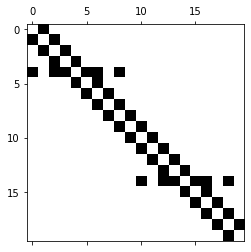

In [16]:
plt.spy(B[100:120,100:120])

In [17]:
#Valores y vectores propios

Lp,Vp=np.linalg.eig(B)  #Lp--> valores propios, V--> vectores propios


### Índices de los valores propios

Se organiza la parte imaginaria de los valores propios de menor a mayor y se obtienen sus índices para poder asociarlos a los vectores propios.

In [18]:
idx = np.argsort(Lp.imag)   #Toma los valores propios y los organiza de menor a mayor y se le asigna un índice a cada uno
L1 = Lp[idx]                #Se organizan los valores propios usando el índice que se tomó en el paso anterior
Vp1 = Vp[:,idx]            #Toma el índice asociado a los valores propios y los asigna a cada columna de la matriz de vectores propios para poder organizarlos
len(Vp1)

889

In [19]:
L11=L1.imag
L1.real,L11
max(L11), L11

(488069308015.73584,
 array([-4.88069308e+11, -4.07233689e+11, -3.95505587e+11, -3.47604264e+11,
        -3.15036157e+11, -3.12140820e+11, -3.09064756e+11, -3.07438601e+11,
        -3.06156214e+11, -3.04124265e+11, -3.03830923e+11, -3.03416807e+11,
        -3.02731567e+11, -3.01775490e+11, -3.01482934e+11, -3.01123036e+11,
        -3.01067262e+11, -3.00974478e+11, -3.00845110e+11, -3.00679795e+11,
        -3.00549703e+11, -3.00479202e+11, -3.00390106e+11, -3.00363899e+11,
        -3.00320241e+11, -3.00259317e+11, -3.00243615e+11, -3.00180395e+11,
        -3.00084472e+11, -2.99976283e+11, -2.99968472e+11, -2.99839985e+11,
        -2.99693088e+11, -2.99668275e+11, -2.99525899e+11, -2.99346858e+11,
        -2.99327429e+11, -2.99142661e+11, -2.99057193e+11, -2.98961816e+11,
        -2.98922078e+11, -2.98690776e+11, -2.98554000e+11, -2.98437666e+11,
        -2.98175027e+11, -2.98111873e+11, -2.97897164e+11, -2.97723093e+11,
        -2.97644505e+11, -2.97546676e+11, -2.97273974e+11, -2.97236

In [20]:
for cero in zip(*np.where(L11<1)):    #Guardo el indice del valor propio=0 (el ultimo)
    cero
cero=cero[0]
print(cero)
if L11[cero+1]<1:
    cero=cero+1
print(cero)

444
444


In [39]:
L2= L11[cero::]      #Tomar los valores positivos de los valores propios ordenados
Vp2= Vp1[:,cero::]
lenL2 = len(L2)
lenL2,len(Vp2),Vp2,L2


(445,
 889,
 array([[ 3.35448448e-02+0.00000000e+00j,  6.54162164e-02+0.00000000e+00j,
          8.10107688e-02+0.00000000e+00j, ...,
         -4.60077759e-16+1.68024464e-17j,  2.55495129e-16-3.20102679e-17j,
          8.90724894e-16+7.22541048e-17j],
        [ 3.35378718e-02-1.47236467e-07j, -1.79168317e-09-7.21572479e-07j,
         -2.04383570e-08-2.56293288e-06j, ...,
         -9.26049725e-20+1.64301534e-18j, -3.40615027e-19-9.65193480e-19j,
          1.98090624e-19-1.96978470e-18j],
        [ 3.35447823e-02+2.92203761e-13j,  6.54150867e-02+3.33570539e-09j,
          8.09992618e-02+1.85787234e-07j, ...,
          7.40432748e-17+6.35409217e-17j, -9.08561926e-17+6.08134288e-17j,
         -1.14823826e-17-1.02309190e-16j],
        ...,
        [ 3.35378801e-02-1.46179357e-07j,  2.53518252e-04+2.27739402e-05j,
         -7.18086606e-04-6.43423945e-05j, ...,
          0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
         -0.00000000e+00+0.00000000e+00j],
        [ 3.353

In [44]:
fnum = np.zeros(lenL2)
for j in range(0,lenL2):
    
    fnum[j] = (L2[j])/(2*np.pi)
    
print("Rango de frecuencias comprendido entre: " + np.format_float_scientific(fnum[1],precision = 3, exp_digits=2) + " Hz y " + np.format_float_scientific(fnum[-1],precision = 3, exp_digits=2) + " Hz")
frecu=int(input("Ingrese un numero entre 0 y " + str(len(L2)-1)  + " para trabajar con esa frecuencia dentro del rango presentado: "))

frecuencia=L2[frecu]/(2*np.pi)

print("Se observarán los campos electromagnéticos asociados a la frecuencia: " + np.format_float_scientific(frecuencia,precision = 3, exp_digits=2) + " Hz.")



Rango de frecuencias comprendido entre: 1.005e+08 Hz y 7.768e+10 Hz
Ingrese un numero entre 0 y 444 para trabajar con esa frecuencia dentro del rango presentado: 70
Se observarán los campos electromagnéticos asociados a la frecuencia: 1.181e+10 Hz.


In [48]:

for num in range(0,len(str(frecuencia))):
    if str(frecuencia)[num]==".":
        print(num)
        long=num
#len(str(frecuencia)),frecuencia
frecuencia,frecuencia+0.5*10**(long-1),frecuencia-0.5*10**(long-1)

11


(11805338609.16575, 16805338609.16575, 6805338609.1657505)

In [49]:
7.65954228e+03/(2*np.pi)
L2[-1],len(L2)
frecuencia+0.5*10**(long-1),L2[-1]

(16805338609.16575, 488069308015.73584)

In [51]:
lista = []
if L2[-1]>=frecuencia+0.5*10**(long-1):
    for freq in zip(*np.where(np.logical_and(L2<=frecuencia+0.5*10**(long-1),L2>=frecuencia-0.5*10**(long-1)))):   #Guardo el indice de los errores que estan por debajo del % de error aceptable
        freq = freq[0]
        lista.append(freq)
    print(lista)
    lenlista = len(lista)

else:
    for freq in zip(*np.where(L2>=L2[-15])):   #Guardo el indice de los errores que estan por debajo del % de error aceptable
        freq = freq[0]
        lista.append(freq)
    
    lenlista = len(lista)  
    
    
nlen=len(lista)       
lenlista,nlen,lista[nlen-1]

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


(10, 10, 16)

In [52]:
val_prop_real=[]
vec_prop_real=[]
vec=Vp2
lista[0]

7

In [53]:
for l in range(0,nlen):
    val_prop_real.append(L2[lista[l]])
    
vec_prop_real=Vp2[:,lista[0]:lista[nlen-1]+1]

In [54]:
L3= (val_prop_real)             #Como los valores propios ordenados ya se habían ordenado y se habían tomado solo los positivos, tomamos los primeros 34 valores de k (positivos)
Vp3=(vec_prop_real)      #Los vectores propios ordenados incluyen negativos y positivos entonces tomamos las columnas correspondientes a los valores propios tomados antes
len(Vp3)
vec_prop_real

array([[ 1.10084199e-01+0.00000000e+00j,  1.21126381e-01+0.00000000e+00j,
        -1.30250372e-01-2.22925799e-05j, ...,
        -1.78443156e-01-1.16302009e-05j, -1.68249863e-01+5.33594698e-06j,
        -8.81970759e-02+1.28995559e-06j],
       [-3.40868024e-08-1.33107167e-05j, -5.27292401e-08-1.69194983e-05j,
         4.54626310e-08+2.04751923e-05j, ...,
        -2.37115411e-08+4.50394447e-05j, -2.38041434e-08+4.42820889e-05j,
        -1.53949973e-08+2.48686052e-05j],
       [ 1.09855778e-01+1.16778367e-06j,  1.20790958e-01+2.09253861e-06j,
        -1.29793561e-01-2.43978383e-05j, ...,
        -1.76829737e-01-1.00374930e-05j, -1.66595761e-01+7.16794022e-06j,
        -8.72018778e-02+2.53437878e-06j],
       ...,
       [ 2.61605995e-03+1.20933784e-04j, -2.61980310e-03-5.08986764e-05j,
        -2.43286316e-03-3.43247671e-05j, ...,
         2.42954461e-03+2.69683497e-05j, -3.18469656e-03-2.26170925e-05j,
         6.58556157e-03+2.13538065e-04j],
       [-8.94372167e-05-1.14035727e-03j,  1.

In [55]:
Vp3_E=Vp3[::2]
Vp3_H=Vp3[1::2]
fila=len(Vp3_E[1,:])
E=np.zeros((len(z),len(Vp3[1,:])),dtype=np.complex_)
H=np.zeros((len(z2),len(Vp3[1,:])),dtype=np.complex_)

len(Vp3_E[1,:]),len(Vp3[1,:]),fila,len(Vp3[1,:]),len(z),len(E),len(H)


(10, 10, 10, 10, 445, 445, 444)

In [56]:
for i in range(0,fila):
    E[:,i]=Vp3_E[:,i]
    H[:,i]=Vp3_H[:,i]

In [57]:
### Crear figura y ejes

def test(i):
    fig = plt.figure(figsize=(14, 20))
    aE1 = fig.add_subplot(321)
    aH1 = fig.add_subplot(322)
    aE2 = fig.add_subplot(323)
    aH2 = fig.add_subplot(324)
    aE3 = fig.add_subplot(325)
    aH3 = fig.add_subplot(326)

# Plot

    
    aE1.plot(z, E[:,i].real,color='blue', linewidth=1)
    aH1.plot(z2, H[:,i].imag,color='red', linewidth=1)


    aE2.plot(z, E[:,i].imag,color='blue', linewidth=1)
    aH2.plot(z2, H[:,i].real,color='red', linewidth=1)


    aE3.plot(z, abs(E[:,i]),color='blue', linewidth=1)
    aH3.plot(z2, abs(H[:,i]),color='red', linewidth=1)
    
    plt.autoscale(enable=True, axis='y')
    plt.autoscale(enable=True, axis='x')

    plt.suptitle('campos E y H')
    plt.xlabel('z')

    return()


In [59]:
interact(test,i=(0,fila-1))
print("Campos electromagnéticos en un rango de frecuencias de: " + np.format_float_scientific(frecuencia-0.5*10**(long-1),precision = 3, exp_digits=2) + " Hz y " + np.format_float_scientific(frecuencia+0.5*10**(long-1),precision = 3, exp_digits=2) + " Hz." )

interactive(children=(IntSlider(value=4, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

Campos electromagnéticos en un rango de frecuencias de: 6.805e+09 Hz y 1.681e+10 Hz.
